# Importing the libraries and creating the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_moons

In [8]:
x, y = make_moons(n_samples = 250, noise = 0.05, random_state = 4)

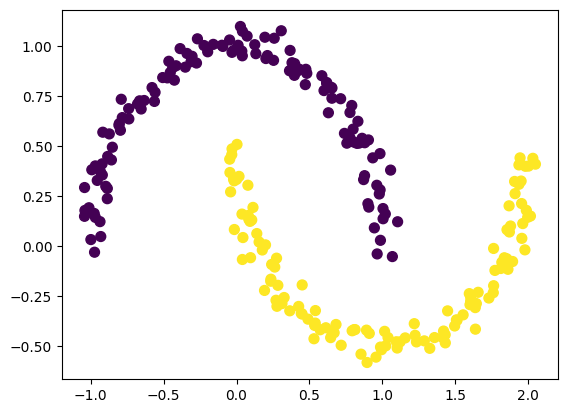

In [9]:
plt.scatter(x[:,0], x[:,1], c = y, s = 50)

# Creating the model

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
ann = Sequential()

In [12]:
ann.add(Dense(units = 10, activation = 'sigmoid', input_dim = 2))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 10, activation = 'sigmoid'))
ann.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
ann.get_weights()[0]

array([[ 0.09348035,  0.50027806,  0.44980294, -0.48831794,  0.68177515,
         0.32892662,  0.6661449 ,  0.30017596,  0.2950856 , -0.2489255 ],
       [-0.0500688 , -0.2355611 ,  0.12131804,  0.20875233, -0.6965672 ,
        -0.23211652,  0.13510996,  0.47929424, -0.47520047, -0.09511346]],
      dtype=float32)

In [18]:
old_weights = ann.get_weights()[0]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
ann.fit(x_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5020 - loss: 0.6976
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4951 - loss: 0.6970 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5343 - loss: 0.6903  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4945 - loss: 0.6944 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4873 - loss: 0.6943 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4974 - loss: 0.6933 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5396 - loss: 0.6926  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5264 - loss: 0.6930  
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4683 - loss: 0.6935  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5190 - loss: 0.6927  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5049 - loss: 0.6932  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5319 

In [21]:
new_weights = ann.get_weights()[0]

In [23]:
ann.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [25]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs((old_weights - new_weights) * 100 / old_weights)

In [26]:
gradient

array([[ 731.91345 ,  -59.666332, -559.58514 ,  557.00385 , -412.71274 ,
        -633.9736  , -563.51306 ,  770.0272  , -437.1402  ,  649.383   ],
       [-991.60785 ,  410.83075 ,  898.6541  , -986.6233  ,  903.4393  ,
        1031.8031  , 1017.47437 , -984.69714 ,  748.72363 , -959.0156  ]],
      dtype=float32)

In [27]:
percent_change

array([[ 782.9598  ,   11.926635,  124.40674 ,  114.06582 ,   60.535023,
         192.74013 ,   84.59317 ,  256.5253  ,  148.14014 ,  260.87442 ],
       [1980.4908  ,  174.40518 ,  740.7424  ,  472.62866 ,  129.69879 ,
         444.51947 ,  753.07135 ,  205.44733 ,  157.55954 , 1008.286   ]],
      dtype=float32)